In [1]:
import pandas as pd
import numpy as np

from matplotlib import figure
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('wordnet')


mt = pd.read_csv('MeTooHate.csv')

[nltk_data] Downloading package stopwords to /Users/alex/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/alex/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


FileNotFoundError: [Errno 2] No such file or directory: 'MeTooHate.csv'

# Let's check our dataset:
***

Because of issues with the size of the MeToo dataset I chose to clean the dataset in another project folder. The full dataset will not be added in this project you will have to download and add it yourself. 

This notebook is the cleaning part where i remove all useless columns and NaN values. Then I undersample the dataset because of the imbalance i category.

This is then put into another CSV file that will be added into this project.


***


In [ ]:
mt.head()

,status_id,text,created_at,favorite_count,retweet_count,location,followers_count,friends_count,statuses_count,category
0,1046207313588236290,"Entitled, obnoxious, defensive, lying weasel. ...",2018-09-30T01:17:15Z,5,1,"McAllen, TX",2253,2303,23856,0
1,1046207328113086464,Thank you and for what you did for the women...,2018-09-30T01:17:19Z,5,2,"Tampa, FL",2559,4989,19889,0
2,1046207329589493760,Knitting (s) &amp; getting ready for January 1...,2018-09-30T01:17:19Z,0,0,"St Cloud, MN",16,300,9,0
3,1046207341283168256,Yep just like triffeling women weaponized thei...,2018-09-30T01:17:22Z,1,0,flyover country,3573,3732,38361,1
4,1046207347016826880,"No, the President wants to end movement posin...",2018-09-30T01:17:23Z,0,0,World,294,312,7635,0


In [ ]:
#Remove useless columns
mt = mt.drop(['status_id','location', 'created_at',
        'followers_count', 'friends_count', 'statuses_count',  'retweet_count', 'favorite_count'
       ], axis=1)

mt = mt.dropna()
mt.shape

(803638, 2)

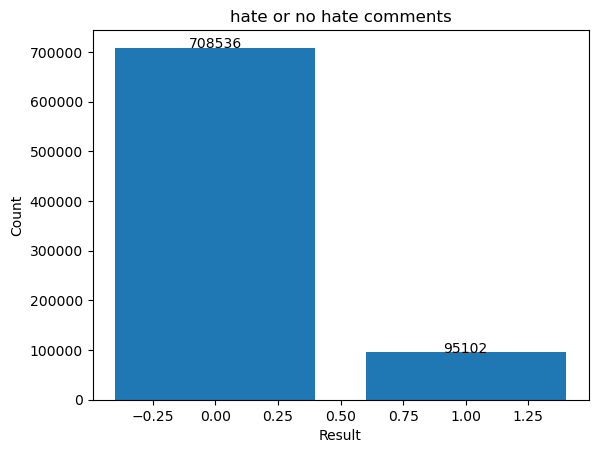

In [ ]:
value_counts = mt['category'].value_counts()

plt.bar(value_counts.index, value_counts.values)
#show amount of 0,1
for i, count in enumerate(value_counts.values):
    plt.text(i, count + 0.5, str(count), ha='center')

plt.xlabel('Result')
plt.ylabel('Count')
plt.title('hate or no hate comments')

plt.show()

In [ ]:
majority_class = mt[mt['category'] == 0]
minority_class = mt[mt['category'] == 1]

undersampled_majority = resample(majority_class, replace=False, n_samples=len(minority_class), random_state=42)

balanced_df = pd.concat([undersampled_majority, minority_class])

balanced_df

,text,category
354758,What is happening to Karim Morani Vinod Dua Ja...,0
270811,Gurantee she's a Trump hating Democrat.,0
200225,The lasting impact of the confirmation:,0
721015,Gillette's 'the best a man can get' ad in era...,0
662344,"For men in the era, don't interact with a wom...",0
...,...,...
807146,Such a good article from in the . is a well ...,1
807150,Please - publish the Paxton Singer story. Par...,1
807159,covington.. christians prolife white kids m...,1
807167,\n\nFor sure NO. I reached out to a dear ...,1


In [ ]:
minority_class.shape

(95102, 2)

In [ ]:
undersampled_majority.shape

(95102, 2)

In [ ]:
sampled_df = balanced_df.sample(frac=0.25, random_state=42)

sampled_df.shape

sampled_df.to_csv('balanced_dataset.csv', index=False)